<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2022-05-14 23:59:59 (Saturday)</font></h2>
<h3 align="center"><font size="5">Total marks: 6.0</font></h3>

### Your information:
- Fullname: Nguyễn Thị Kim Hoàng
- Date of birth: 07-09-1990
- Place of birth: Ninh Thuận
- Email: nguyenhoang90.hd08@gmail.com
- Mobile phone: 0944.298.989

In this notebook, we practice all the knowledge and skills that we have learned in this course (LDS5: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"price of car"** by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. **price: continuous from 5118 to 45400.**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Đọc dữ liệu

In [1371]:
df = pd.read_csv('imports_85.csv',header = None)

In [1372]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


##### Dữ liệu chưa có tên biến. Ta cần gán tên cho các cột. Ta có 26 cột tương ứng 26 biến. <br>
Dưới  đây là danh sách các biến cùng với ý nghĩa của từng biến
1. symboling: biến này xếp hạng rủi ro so với mức giá của xe. Xe hơi ban đầu được gán một ký hiệu yếu tố rủi ro liên quan đến giá của nó. Sau đó, nếu nó rủi ro hơn (hoặc ít hơn), biểu tượng này được điều chỉnh bằng cách di chuyển nó lên (hoặc xuống) thang đo. Giá trị +3 cho thấy ô tô có rủi ro, -3 rằng ô tô khá an toàn.
2. normalized-losses: các mất mát được chuẩn hóa 
3. make: nhãn hiệu xe
4. fuel-type: loại xăng
5. aspiration: bộ hút
6. num-of-doors: số cửa xe
7. body-style: kiểu thân xe
8. drive-wheels: loại hệ dẫn động
9. engine-location: vị trí động cơ
10. wheel-base: khoảng cách giữa 2 trục bánh xe
11. length: chiều dài
12. width: chiều ngang
13. height: chiều cao
14. curb-weight: cân nặng xe khi đầy xăng và thiết bị
15. engine-type: loại động cơ
16. num-of-cylinders: số lượng xi lanh
17. engine-size: kích cỡ động cơ
18. fuel-system: hệ thống nhiên liệu
19. bore: đường kính buồng đốt (buồng đốt là khoảng không bên trên pít tông)
20. stroke: hành trình dên (là khoảng cách giữa hành trình của pít tông từ đáy của buồng đốt đến đỉnh của buồng đốt)
21. compression-ratio: tỉ lệ nén (được tính theo bore và stroke)
22. horsepower: sức ngựa
23. peak-rpm: vòng tua máy (số vòng quay của trục khuỷu trong vòng 1 phút)
24. city-mpg: lượng tiêu thụ xăng khi xe chạy trong thành phố(tính bằng miles/gallon)
25. highway-mpg: lượng tiêu thụ xăng khi xe chạy trên cao tốc (tính bằng miles/gallon)
26. price: giá xe

In [1373]:
name_columns = ['symboling','normalizedlosses','make','fueltype',
                'aspiration','numofdoors','bodystyle','drivewheels',
                'enginelocation','wheelbase','length','width',
                'height','curbweight','enginetype','numofcylinders',
                'enginesize','fuelsystem','bore','stroke',
                'compressionratio','horsepower','peakrpm','citympg',
                'highwaympg','price'
               ]
df.columns = name_columns
df.head()


,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Xem thông tin sơ bộ

### Kiểm tra có giá trị không hợp lệ

In [1374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   normalizedlosses  205 non-null    object 
 2   make              205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   numofdoors        205 non-null    object 
 6   bodystyle         205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  numofcylinders    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1375]:
df.isnull().sum()

symboling           0
normalizedlosses    0
make                0
fueltype            0
aspiration          0
numofdoors          0
bodystyle           0
drivewheels         0
enginelocation      0
wheelbase           0
length              0
width               0
height              0
curbweight          0
enginetype          0
numofcylinders      0
enginesize          0
fuelsystem          0
bore                0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

1. Ta thấy rằng không có biến nào bị Null. Nhưng ở normalizedlosses ta thấy có dấu '?' nên bộ dữ liệu vẫn cần xem xét cho từng biến và xử lý missing data.
2. Biến normalizedlosses, horsepower, peakrpm, price là số rời rạc nhưng hiện đang là object. Cần đổi kiểu int.
3. Biến bore, stroke là biến liên tục nhưng hiện đang là object. Cần đổi kiểu sang float.
4. Các biến cần đổi sang kiểu category gồm có: numofdoors, numofcylinders.
5. Các biến cần đổi sang kiểu nominal gồm có: make, fueltype, aspiration, bodystyle, drivewheels, enginelocation, enginetype,fuelsystem. 

Có nhiều biến cần đổi sang kiểu nominal, và các biến này lại có nhiều giá trị nên có thể làm dữ liệu đầu vào cho mô hình tăng lên đáng kể, làm tốn không gian lưu trữ và tài nguyên tính toán.



In [1376]:
df.describe(include = 'all')

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Ta thấy hầu như các biến đều có missing nên thống kê mô tả có nhiều giá trị NaN.

## Làm sạch dữ liệu

### Biến symboling

In [1377]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [1378]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

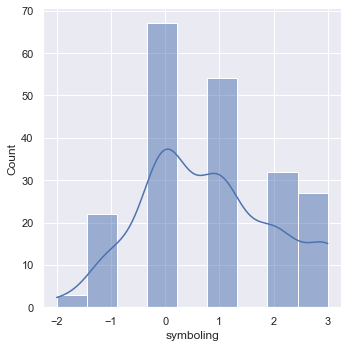

In [1379]:
sns.displot(df.symboling,kde=True)

In [1380]:
df.symboling.skew()

0.21107227205788776

Biến symboling không có giá trị không hợp lệ và phân phối có dạng gần với phân phối chuẩn. 

### Biến normalizedlosses

In [1381]:
df.normalizedlosses.unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [1382]:
df.normalizedlosses.value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalizedlosses, dtype: int64

Biến normalizedlosses có missing data. Ta thử hiển thị dữ liệu để kiểm tra phân phối và lựa chọn cách xử lý missing data.

In [1383]:
temp = df.normalizedlosses

In [1384]:
droptemp = temp.drop(temp[temp=='?'].index)

In [1385]:
len(droptemp), np.shape(df)[0]-41

(164, 164)

<AxesSubplot:xlabel='normalizedlosses', ylabel='Density'>

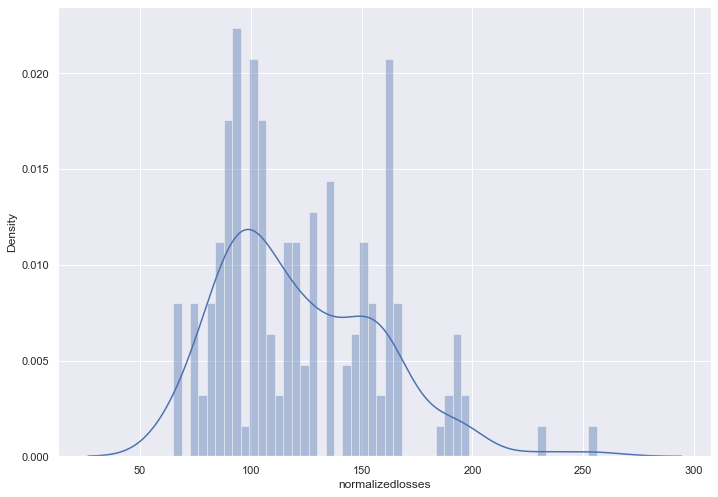

In [1386]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(droptemp,kde=True,bins=50)
#sns.displot(droptemp)

In [1387]:
droptemp.skew()

0.7659764175950632

Biến normalizedlosses có phân phối khá gần với phân phối chuẩn và ít bị lệch. Ta sử dụng giá trị trung bình thay thế cho những chỗ có dấu '?'. 

In [1388]:
df.normalizedlosses[df.normalizedlosses=='?'] = np.mean(droptemp.astype(int))

In [1389]:
df.normalizedlosses.unique()

array([122.0, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [1390]:
df.normalizedlosses.astype(int).value_counts()

122    45
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
65      5
94      5
168     5
106     4
148     4
118     4
93      4
83      3
101     3
115     3
154     3
125     3
137     3
108     2
87      2
119     2
194     2
197     2
89      2
158     2
192     2
113     2
188     2
81      2
110     2
145     2
129     2
164     2
153     2
186     1
107     1
78      1
231     1
77      1
142     1
98      1
121     1
90      1
256     1
Name: normalizedlosses, dtype: int64

Ta biểu diễn lại dữ liệu normalizedlosses:

<AxesSubplot:xlabel='normalizedlosses', ylabel='Density'>

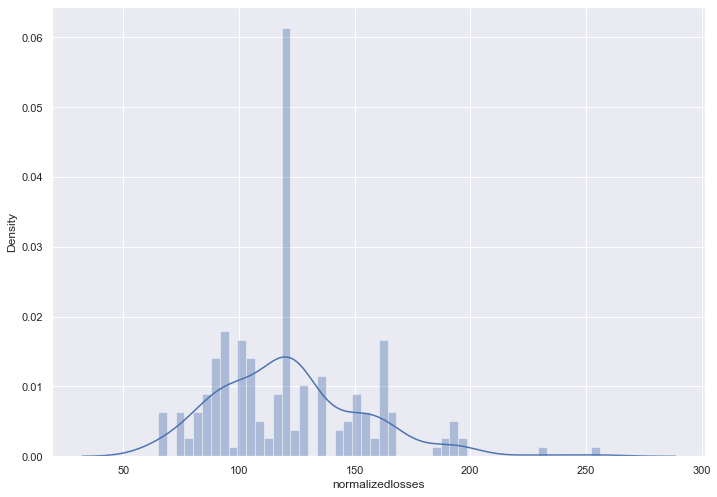

In [1391]:
df.normalizedlosses = df.normalizedlosses.astype(int)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df.normalizedlosses,kde=True,bins=50)
#sns.displot(droptemp)

Số lượng missing data rất nhiều nên sử dụng phương pháp thay thế bằng mean vẫn chưa hợp lý. Ta sẽ tiếp tục phân tích các biến khác để xem có phát hiện gì giúp cải tiến vấn đề missing data ở biến này ko.

Dải giá trị của biến cũng khá xa, nên xem xét outlier và biến đổi scaler cho biến này (cụ thể có thể lấy log).

<AxesSubplot:xlabel='log_normalizedlosses', ylabel='Density'>

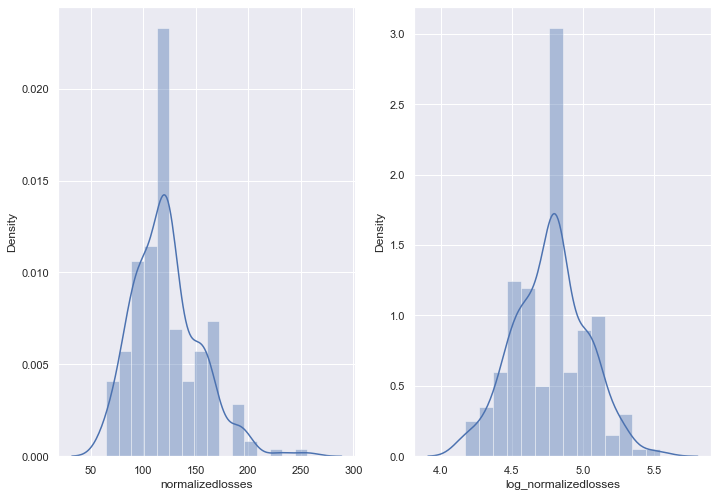

In [1392]:
df['log_normalizedlosses'] = np.log(df['normalizedlosses'])
plt.subplot(1, 2, 1)
sns.distplot(df['normalizedlosses'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_normalizedlosses'])

In [1393]:
df = df.drop('normalizedlosses',axis=1)
df.shape

(205, 26)

### Biến make:

In [1394]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1395]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

<AxesSubplot:>

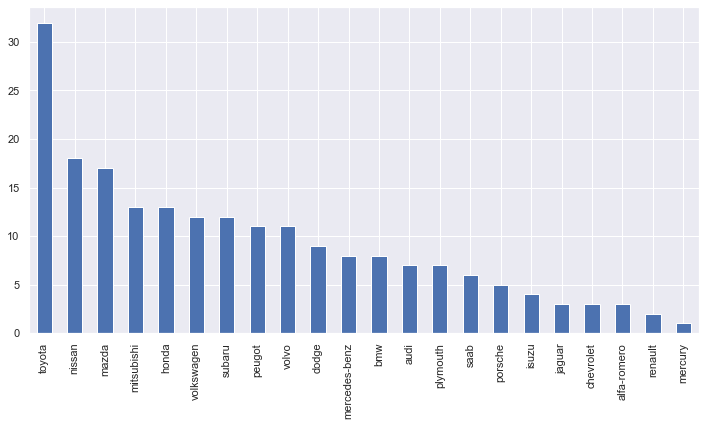

In [1396]:
plt.figure(figsize = (12,6))
df.make.value_counts().plot(kind='bar')

Biến make không có missing data. Ta biến đổi biến về dạng nominal sử dụng get_dummies.

In [1397]:
make1hot = pd.get_dummies(df['make'],prefix = 'make')
make1hot = make1hot.drop('make_mercury',axis=1)
make1hot.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1398]:
df = pd.concat([df, make1hot], axis=1)
df = df.drop(['make'], axis=1)
df.head()

,symboling,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [1399]:
df.shape

(205, 46)

### Biến fuel-type

In [1400]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [1401]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

Biến chỉ nhận 2 giá trị và không có missing data. Ta chuyển fueltype về dạng dummy.

In [1402]:
df = pd.get_dummies(df, columns=['fueltype'],drop_first=True)
df

,symboling,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,...,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fueltype_gas
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,1
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,1
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,0,1,1
201,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,0,0,0,0,0,0,0,0,1,1
202,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,0,1,1
203,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,0,1,0


In [1403]:
df.shape

(205, 46)

### Biến aspiration

In [1404]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [1405]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

Ta cũng làm tương tự như biến fueltype.

In [1406]:
df = pd.get_dummies(df, columns=['aspiration'],drop_first=True)
df

,symboling,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,...,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fueltype_gas,aspiration_turbo
0,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
1,3,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
2,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,1,0
3,2,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,1,0
4,2,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,0,0,1,1,0
201,-1,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,0,0,1,1,1
202,-1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,...,0,0,0,0,0,0,0,1,1,0
203,-1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,0,0,1,0,1


In [1407]:
df.shape

(205, 46)

### Biến numofdoors

In [1408]:
df.numofdoors.unique()

array(['two', 'four', '?'], dtype=object)

In [1409]:
df.numofdoors.value_counts()

four    114
two      89
?         2
Name: numofdoors, dtype: int64

Chỉ missing 2 dữ liệu. Ta thay 2 dữ liệu này bằng giá trị xuất hiện nhiều nhất là four

In [1410]:
df.numofdoors[df.numofdoors=='?'] = df.numofdoors.mode()[0]

In [1411]:
df.numofdoors.value_counts()

four    116
two      89
Name: numofdoors, dtype: int64

Ta chuyển đổi biến về dạng category.

In [1412]:
from sklearn import preprocessing

In [1413]:
encode = preprocessing.LabelEncoder()
df.numofdoors = encode.fit_transform(df.numofdoors)
df

,symboling,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,...,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fueltype_gas,aspiration_turbo
0,3,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
1,3,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
2,1,1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,1,0
3,2,0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,1,0
4,2,0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,0,0,1,1,0
201,-1,0,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,0,0,1,1,1
202,-1,0,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,...,0,0,0,0,0,0,0,1,1,0
203,-1,0,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,0,0,1,0,1


In [1414]:
df.shape

(205, 46)

### Biến bodystyle

In [1415]:
df.bodystyle.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [1416]:
df.bodystyle.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: bodystyle, dtype: int64

<AxesSubplot:>

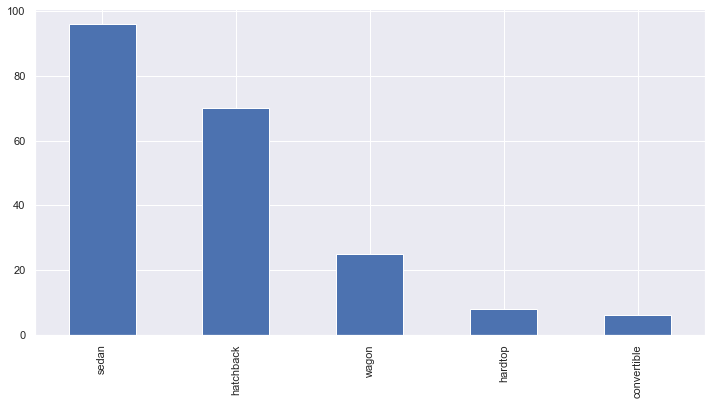

In [1417]:
plt.figure(figsize = (12,6))
df.bodystyle.value_counts().plot(kind='bar')

Biến bodystyle không có missing value. Ta biến đổi biến về dạng nominal.

In [1418]:
bodystyle1hot = pd.get_dummies(df['bodystyle'],prefix = 'bodystyle')
bodystyle1hot = bodystyle1hot.drop('bodystyle_convertible',axis=1)
bodystyle1hot.head()

,bodystyle_hardtop,bodystyle_hatchback,bodystyle_sedan,bodystyle_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [1419]:
df = pd.concat([df, bodystyle1hot], axis=1)
df = df.drop(['bodystyle'], axis=1)
df.head()

,symboling,numofdoors,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,...,make_subaru,make_toyota,make_volkswagen,make_volvo,fueltype_gas,aspiration_turbo,bodystyle_hardtop,bodystyle_hatchback,bodystyle_sedan,bodystyle_wagon
0,3,1,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,0,0,0,0,1,0,0,0,0,0
1,3,1,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,0,0,0,0,1,0,0,0,0,0
2,1,1,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,0,0,0,0,1,0,0,1,0,0
3,2,0,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,0,0,0,0,1,0,0,0,1,0
4,2,0,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,0,0,0,0,1,0,0,0,1,0


In [1420]:
df.shape

(205, 49)

### Biến drivewheels

In [1421]:
df.drivewheels.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [1422]:
df.drivewheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheels, dtype: int64

<AxesSubplot:>

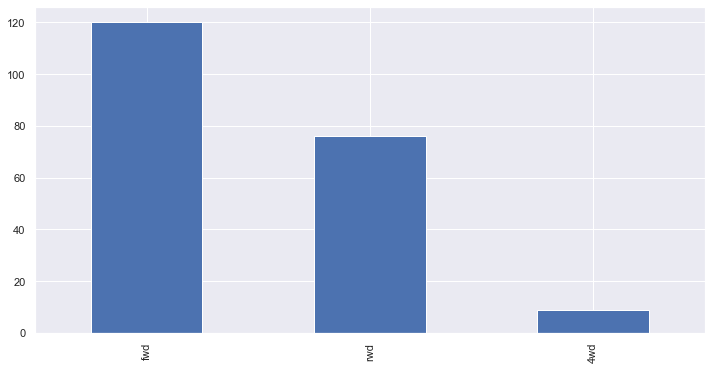

In [1423]:
plt.figure(figsize = (12,6))
df.drivewheels.value_counts().plot(kind='bar')

Biến drivewheels không có missing value. Ta biến đổi biến về dạng nominal.

In [1424]:
drivewheels1hot = pd.get_dummies(df['drivewheels'],prefix = 'drivewheels')
drivewheels1hot = drivewheels1hot.drop('drivewheels_4wd',axis=1)
drivewheels1hot.head()

,drivewheels_fwd,drivewheels_rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [1425]:
df = pd.concat([df, drivewheels1hot], axis=1)
df = df.drop(['drivewheels'], axis=1)
df.head()

,symboling,numofdoors,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,...,make_volkswagen,make_volvo,fueltype_gas,aspiration_turbo,bodystyle_hardtop,bodystyle_hatchback,bodystyle_sedan,bodystyle_wagon,drivewheels_fwd,drivewheels_rwd
0,3,1,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,0,0,1,0,0,0,0,0,0,1
1,3,1,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,0,0,1,0,0,0,0,0,0,1
2,1,1,front,94.5,171.2,65.5,52.4,2823,ohcv,six,...,0,0,1,0,0,1,0,0,0,1
3,2,0,front,99.8,176.6,66.2,54.3,2337,ohc,four,...,0,0,1,0,0,0,1,0,1,0
4,2,0,front,99.4,176.6,66.4,54.3,2824,ohc,five,...,0,0,1,0,0,0,1,0,0,0


In [1426]:
df.shape

(205, 50)

### Biến enginelocation

In [1427]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [1428]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

Biến không có missing data. Nhưng ta thấy biến này bị mất cân bằng.

Ta cần chuyển đổi biến này thành dạng nominal.

In [1429]:
df = pd.get_dummies(df, columns=['enginelocation'],drop_first=True)
df

,symboling,numofdoors,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,...,make_volvo,fueltype_gas,aspiration_turbo,bodystyle_hardtop,bodystyle_hatchback,bodystyle_sedan,bodystyle_wagon,drivewheels_fwd,drivewheels_rwd,enginelocation_rear
0,3,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,0,1,0,0,0,0,0,0,1,0
1,3,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,0,1,0,0,0,0,0,0,1,0
2,1,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,...,0,1,0,0,1,0,0,0,1,0
3,2,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,...,0,1,0,0,0,1,0,1,0,0
4,2,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,109.1,188.8,68.9,55.5,2952,ohc,four,141,...,1,1,0,0,0,1,0,0,1,0
201,-1,0,109.1,188.8,68.8,55.5,3049,ohc,four,141,...,1,1,1,0,0,1,0,0,1,0
202,-1,0,109.1,188.8,68.9,55.5,3012,ohcv,six,173,...,1,1,0,0,0,1,0,0,1,0
203,-1,0,109.1,188.8,68.9,55.5,3217,ohc,six,145,...,1,0,1,0,0,1,0,0,1,0


In [1430]:
df.shape

(205, 50)

### Biến wheelbase

In [1431]:
df.wheelbase.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

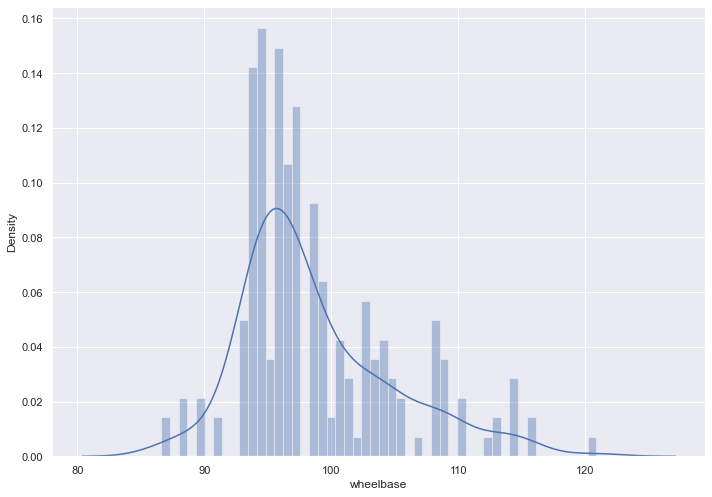

In [1432]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df.wheelbase,kde=True,bins=50)
#sns.displot(droptemp)

Biến có phân phối gần với dạng phân phối chuẩn và khá bị lệch phải. Ta cần xem xét có outlier hay không

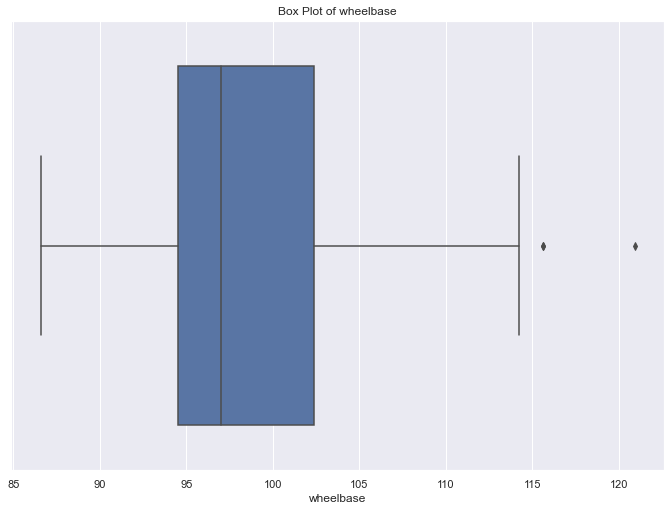

In [1433]:
sns.boxplot(df.wheelbase)
plt.xlabel("wheelbase")
plt.title("Box Plot of wheelbase")
plt.show()

Có 2 giá trị outlier. Tuy nhiên so sánh thực tế, có những giá trị wheelbase này. Ta nhận các giá trị outlier mà không cần loại bỏ

Ta thử xem xét lấy log dữ liệu này

<AxesSubplot:xlabel='log_wheelbase', ylabel='Density'>

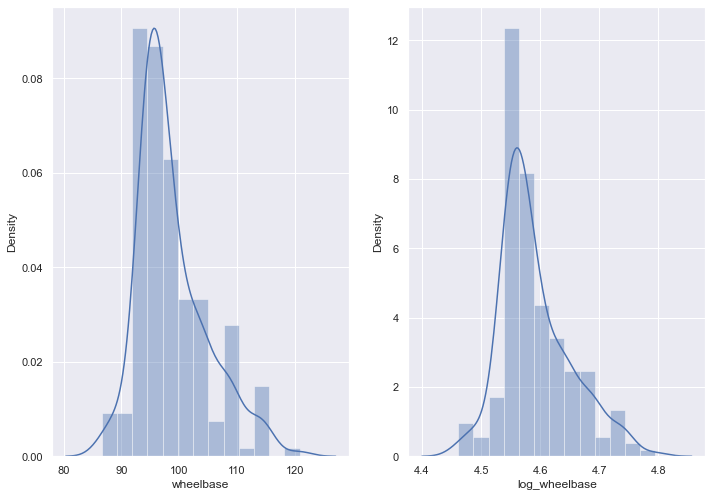

In [1434]:
df['log_wheelbase'] = np.log(df['wheelbase'])
plt.subplot(1, 2, 1)
sns.distplot(df['wheelbase'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_wheelbase'])

In [1435]:
df = df.drop('wheelbase',axis=1)
df.shape

(205, 50)

### Biến length

In [1436]:
df.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

<AxesSubplot:xlabel='length', ylabel='Density'>

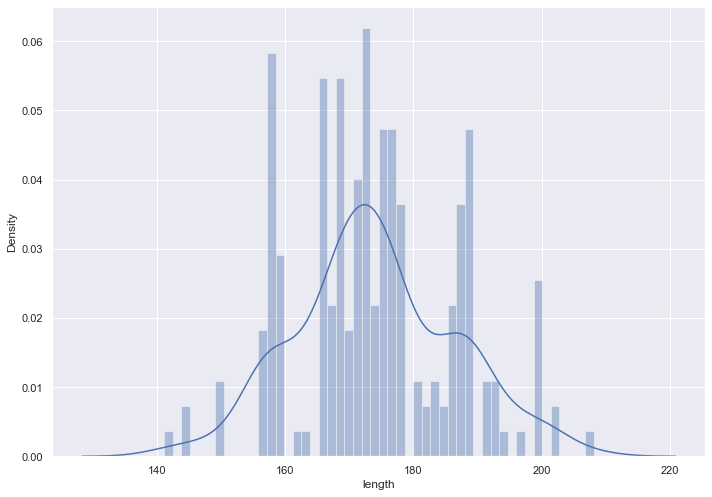

In [1437]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df.length,kde=True,bins=50)
#sns.displot(droptemp)

Biến có phân phối khá đối xứng

### Biến width

In [1438]:
df.width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

<AxesSubplot:xlabel='width', ylabel='Density'>

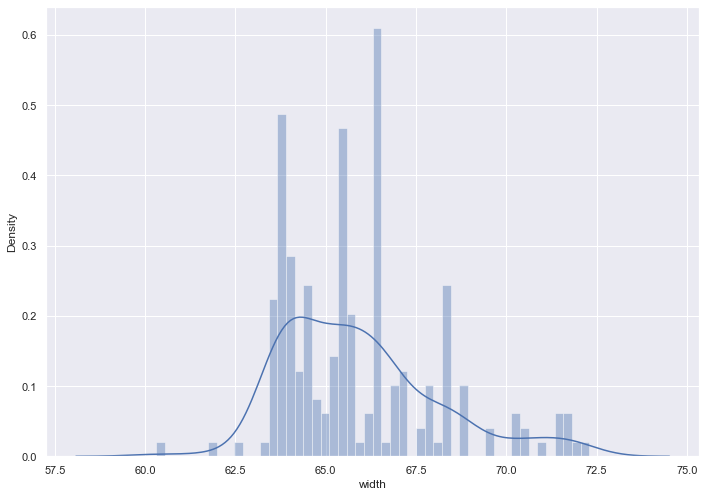

In [1439]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df.width,kde=True,bins=50)
#sns.displot(droptemp)

Ta thử lấy log dữ liệu này.

<AxesSubplot:xlabel='log_width', ylabel='Density'>

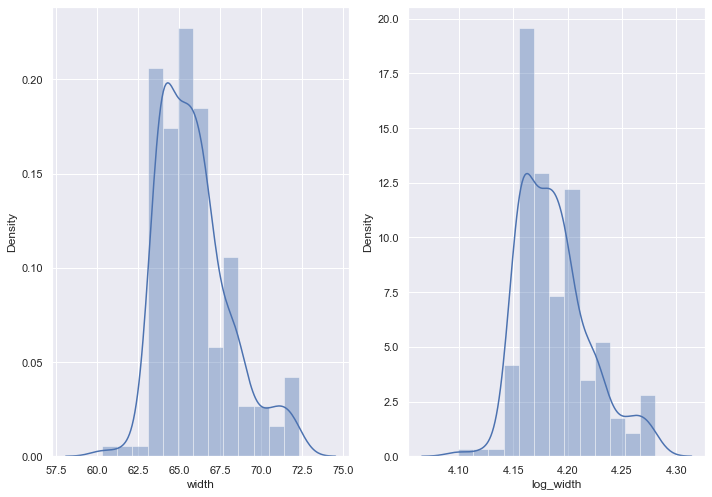

In [1440]:
df['log_width'] = np.log(df['width'])
plt.subplot(1, 2, 1)
sns.distplot(df['width'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_width'])

In [1441]:
df = df.drop('width',axis=1)
df.shape

(205, 50)

### Biến height

In [1442]:
df.height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

<AxesSubplot:xlabel='height', ylabel='Density'>

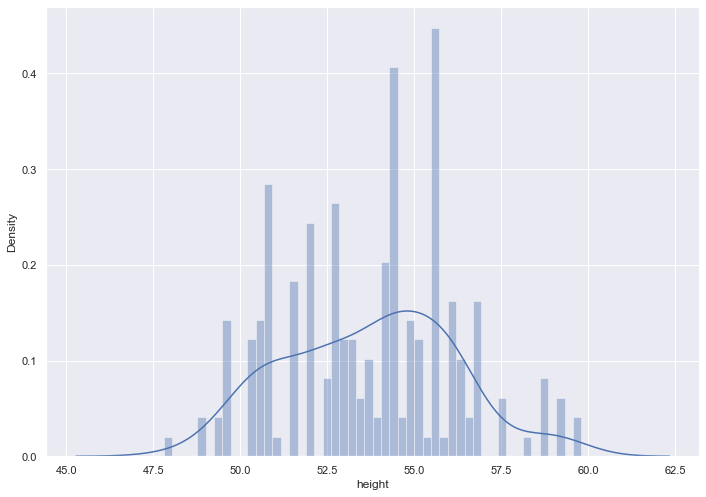

In [1443]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df.height,kde=True,bins=50)
#sns.displot(droptemp)

<AxesSubplot:xlabel='log_height', ylabel='Density'>

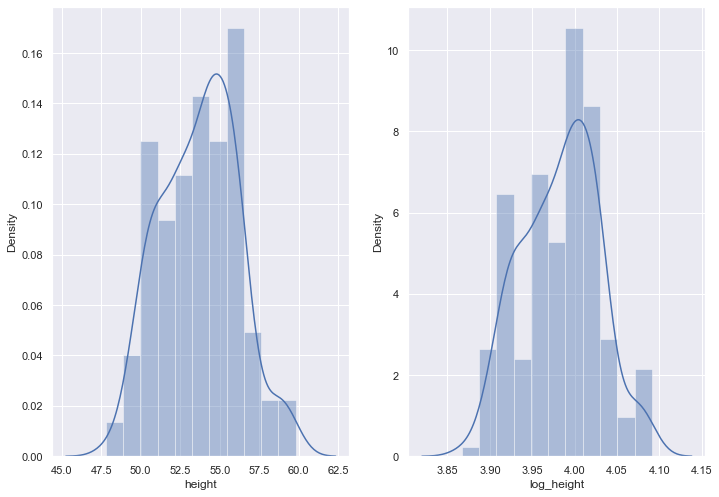

In [1444]:
df['log_height'] = np.log(df['height'])
plt.subplot(1, 2, 1)
sns.distplot(df['height'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_height'])

In [1445]:
df = df.drop('height',axis=1)
df.shape

(205, 50)

### Biến curbweight

In [1446]:
df.curbweight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

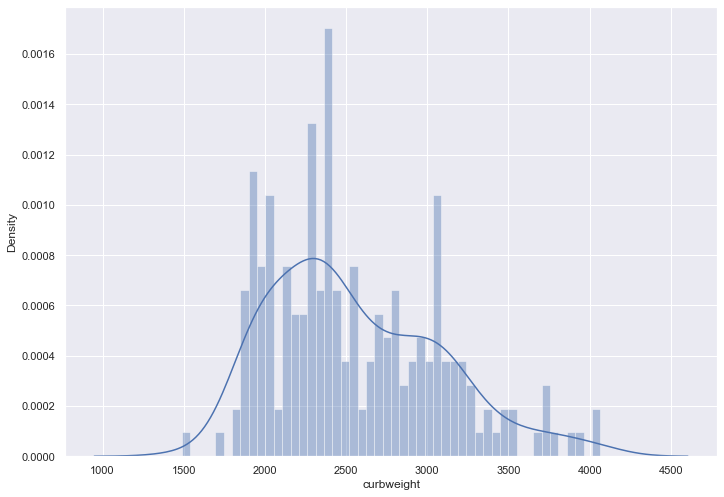

In [1447]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df.curbweight,kde=True,bins=50)
#sns.displot(droptemp)

Ta thử lấy log cho biến này

<AxesSubplot:xlabel='log_curbweight', ylabel='Density'>

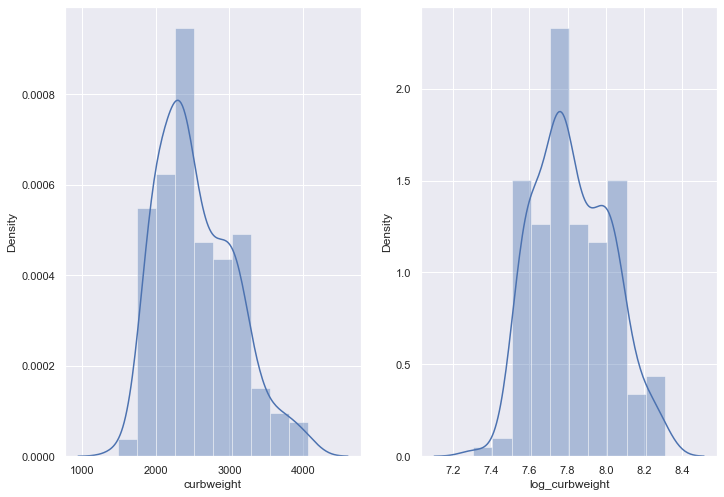

In [1448]:
df['log_curbweight'] = np.log(df['curbweight'])
plt.subplot(1, 2, 1)
sns.distplot(df['curbweight'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_curbweight'])

In [1449]:
df = df.drop('curbweight',axis=1)
df.shape

(205, 50)

### Biến enginetype

In [1450]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [1451]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

<AxesSubplot:>

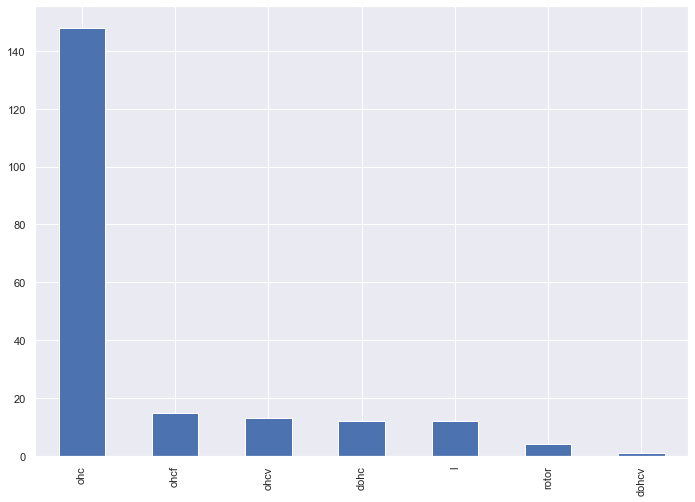

In [1452]:
df.enginetype.value_counts().plot(kind = 'bar')

Ta biến đổi biến này về nominal.

In [1453]:
enginetype1hot = pd.get_dummies(df['enginetype'],prefix = 'enginetype')
enginetype1hot = enginetype1hot.drop('enginetype_dohcv',axis=1)
enginetype1hot.head()

,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [1454]:
df = pd.concat([df, enginetype1hot], axis=1)
df = df.drop(['enginetype'], axis=1)
df.head()

,symboling,numofdoors,length,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,...,log_wheelbase,log_width,log_height,log_curbweight,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,1,168.8,four,130,mpfi,3.47,2.68,9.0,111,...,4.484132,4.160444,3.887730,7.843064,1,0,0,0,0,0
1,3,1,168.8,four,130,mpfi,3.47,2.68,9.0,111,...,4.484132,4.160444,3.887730,7.843064,1,0,0,0,0,0
2,1,1,171.2,six,152,mpfi,2.68,3.47,9.0,154,...,4.548600,4.182050,3.958907,7.945555,0,0,0,0,1,0
3,2,0,176.6,four,109,mpfi,3.19,3.40,10.0,102,...,4.603168,4.192680,3.994524,7.756623,0,0,1,0,0,0
4,2,0,176.6,five,136,mpfi,3.19,3.40,8.0,115,...,4.599152,4.195697,3.994524,7.945910,0,0,1,0,0,0


In [1455]:
df.shape

(205, 55)

### Biến numofcylinders

In [1456]:
df.numofcylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [1457]:
df.numofcylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: numofcylinders, dtype: int64

<AxesSubplot:>

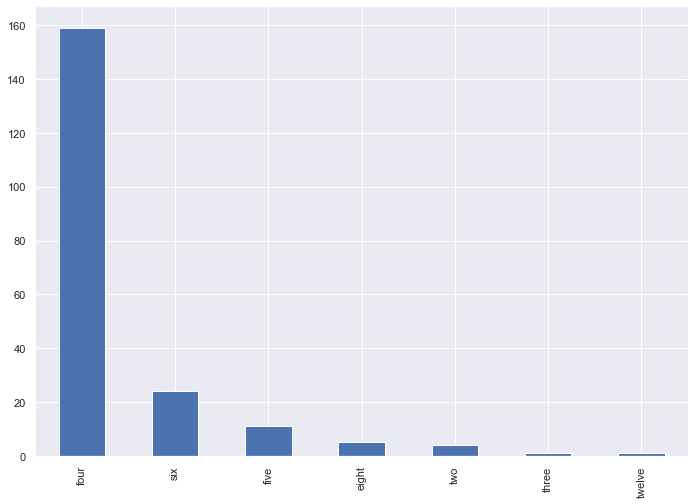

In [1458]:
df.numofcylinders.value_counts().plot(kind='bar')

Ta nên đổi các giá trị chữ thành số cho biến này.

In [1459]:
encode = preprocessing.LabelEncoder()
df.numofcylinders = encode.fit_transform(df.numofcylinders)

In [1460]:
df.shape

(205, 55)

### Biến enginesize

In [1461]:
df.enginesize.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

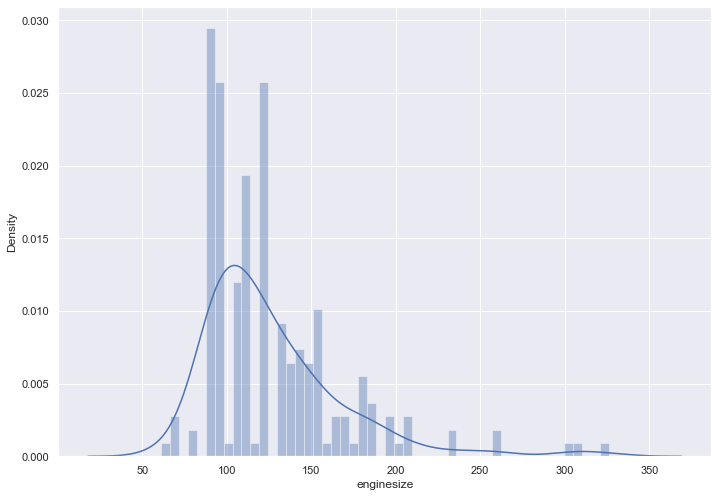

In [1462]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df.enginesize,kde=True,bins=50)
#sns.displot(droptemp)

Biến có phân phối gần chuẩn, lệch phải. Ta lấy log.

<AxesSubplot:xlabel='log_enginesize', ylabel='Density'>

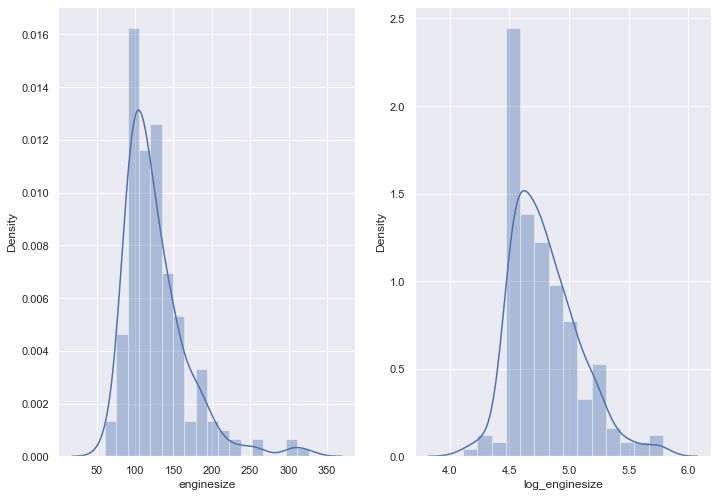

In [1463]:
df['log_enginesize'] = np.log(df['enginesize'])
plt.subplot(1, 2, 1)
sns.distplot(df['enginesize'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_enginesize'])

In [1464]:
df = df.drop('enginesize',axis=1)
df.shape

(205, 55)

### Biến fuelsystem

In [1465]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [1466]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

<AxesSubplot:>

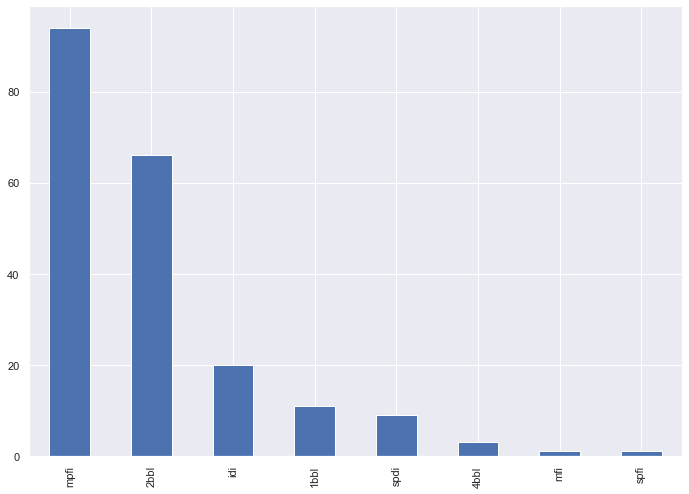

In [1467]:
df.fuelsystem.value_counts().plot(kind='bar')

In [1468]:
fuelsystem1hot = pd.get_dummies(df['fuelsystem'],prefix = 'fuelsystem')
fuelsystem1hot = fuelsystem1hot.drop('fuelsystem_spfi',axis=1)
fuelsystem1hot.head()

,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [1469]:
df = pd.concat([df, fuelsystem1hot], axis=1)
df = df.drop(['fuelsystem'], axis=1)
df.head()

,symboling,numofdoors,length,numofcylinders,bore,stroke,compressionratio,horsepower,peakrpm,citympg,...,enginetype_ohcv,enginetype_rotor,log_enginesize,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,3,1,168.8,2,3.47,2.68,9.0,111,5000,21,...,0,0,4.867534,0,0,0,0,0,1,0
1,3,1,168.8,2,3.47,2.68,9.0,111,5000,21,...,0,0,4.867534,0,0,0,0,0,1,0
2,1,1,171.2,3,2.68,3.47,9.0,154,5000,19,...,1,0,5.023881,0,0,0,0,0,1,0
3,2,0,176.6,2,3.19,3.40,10.0,102,5500,24,...,0,0,4.691348,0,0,0,0,0,1,0
4,2,0,176.6,1,3.19,3.40,8.0,115,5500,18,...,0,0,4.912655,0,0,0,0,0,1,0


In [1470]:
df.shape

(205, 61)

### Biến bore

In [1471]:
df.bore.unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [1472]:
df.bore.value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.70     5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.50     2
3.80     2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.60     1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

Biến có giá trị missing value.

In [1473]:
temp = df.bore[df.bore!='?']
len(temp)

201

<AxesSubplot:xlabel='bore', ylabel='Density'>

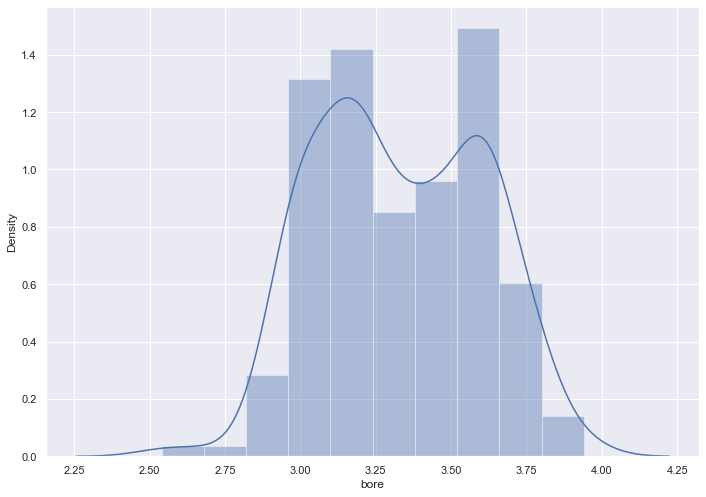

In [1474]:
sns.distplot(temp,kde=True)

Dữ liệu khá đối xứng. Ta thay missing value bằng giá trị trung bình

In [1475]:
df.loc[df['bore']=='?','bore'] = np.mean(temp.astype(float))

In [1476]:
df.bore.value_counts()

3.62                  23
3.19                  20
3.15                  15
3.03                  12
2.97                  12
3.46                   9
3.31                   8
3.78                   8
3.43                   8
3.27                   7
2.91                   7
3.39                   6
3.54                   6
3.05                   6
3.58                   6
3.70                   5
3.01                   5
3.35                   4
3.3297512437810943     4
3.17                   3
3.59                   3
3.74                   3
3.47                   2
3.94                   2
3.24                   2
3.13                   2
3.63                   2
3.50                   2
3.80                   2
3.33                   2
2.54                   1
3.08                   1
3.61                   1
3.34                   1
3.60                   1
2.92                   1
3.76                   1
2.68                   1
2.99                   1
Name: bore, dtype: int64

<AxesSubplot:xlabel='bore', ylabel='Density'>

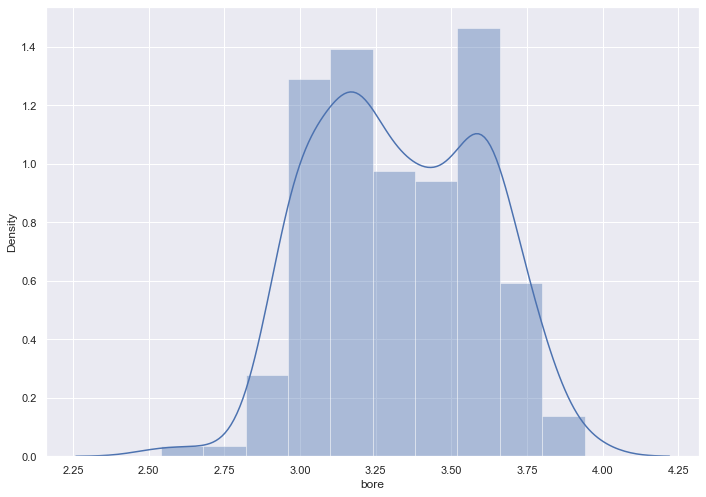

In [1477]:
df.bore=df.bore.astype(float)
sns.distplot(df.bore,kde=True)

### Biến stroke

In [1478]:
df.stroke.describe()

count      205
unique      37
top       3.40
freq        20
Name: stroke, dtype: object

In [1479]:
df.stroke.value_counts()

3.40    20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.50     6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.90     3
2.90     3
3.10     2
4.17     2
2.80     2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [1480]:
temp = df.stroke[df.stroke!='?']
len(temp)

201

<AxesSubplot:xlabel='stroke', ylabel='Density'>

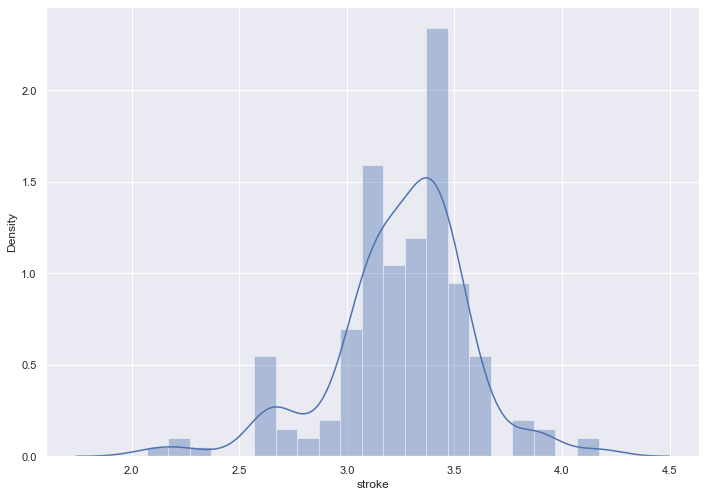

In [1481]:
sns.distplot(temp,kde=True)

In [1482]:
df.loc[df['stroke']=='?','stroke'] = np.mean(temp.astype(float))

In [1483]:
df.stroke.value_counts()

3.40                 20
3.23                 14
3.15                 14
3.03                 14
3.39                 13
2.64                 11
3.29                  9
3.35                  9
3.46                  8
3.11                  6
3.27                  6
3.41                  6
3.07                  6
3.58                  6
3.19                  6
3.50                  6
3.64                  5
3.52                  5
3.86                  4
3.54                  4
3.47                  4
3.255422885572139     4
3.90                  3
2.90                  3
3.10                  2
4.17                  2
2.80                  2
2.19                  2
3.08                  2
2.68                  2
2.36                  1
3.16                  1
2.07                  1
3.21                  1
3.12                  1
2.76                  1
2.87                  1
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='Density'>

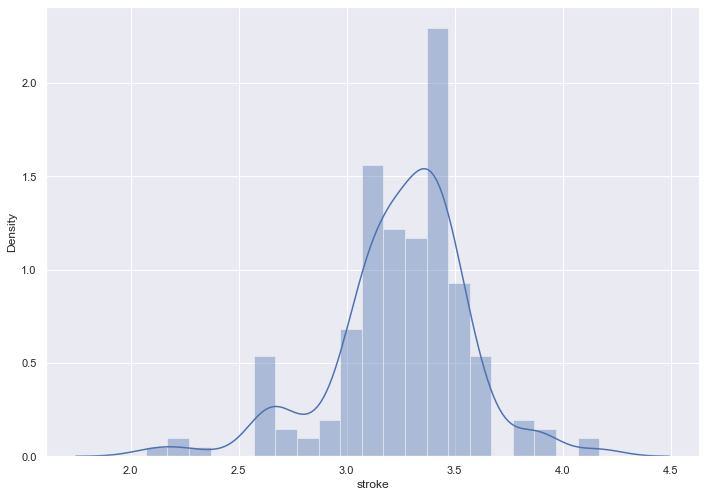

In [1484]:
df.stroke=df.stroke.astype(float)
sns.distplot(df.stroke,kde=True)

### Biến compressionratio

In [1485]:
df.compressionratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

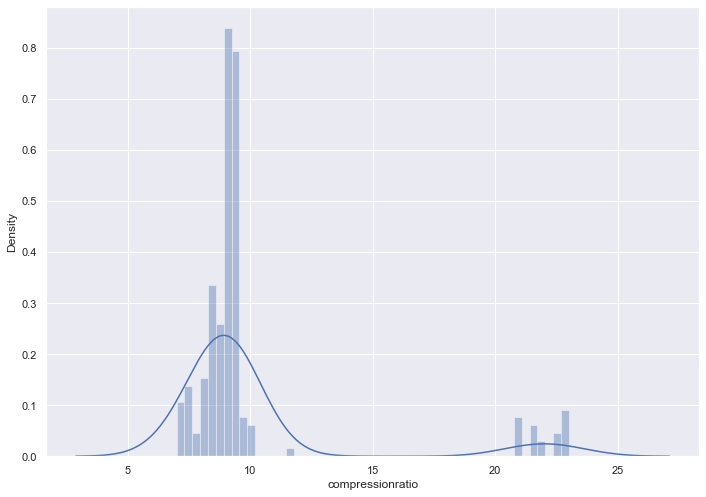

In [1486]:
sns.distplot(df.compressionratio,kde=True)

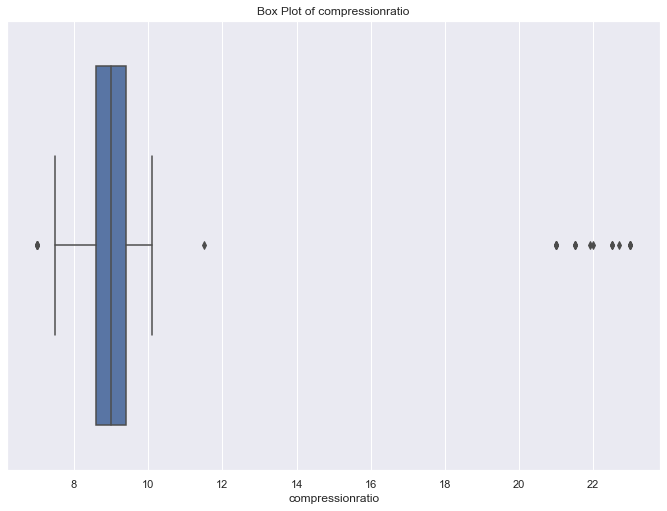

In [1487]:
sns.boxplot(df.compressionratio)
plt.xlabel("compressionratio")
plt.title("Box Plot of compressionratio")
plt.show()

Ta thử dùng biến đổi log cho biến này

<AxesSubplot:xlabel='log_compressionratio', ylabel='Density'>

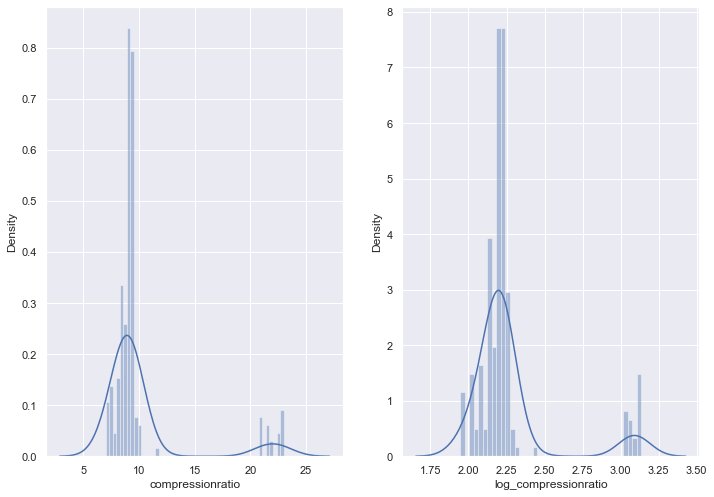

In [1488]:
df['log_compressionratio'] = np.log(df['compressionratio'])
plt.subplot(1, 2, 1)
sns.distplot(df['compressionratio'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_compressionratio'])

In [1489]:
df = df.drop('compressionratio',axis=1)
df.shape

(205, 61)

### Biến horsepower

In [1490]:
df.horsepower.describe()

count     205
unique     60
top        68
freq       19
Name: horsepower, dtype: object

In [1491]:
df.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

Có 2 giá trị bị missing. Với số lượng nhỏ này ta thay bằng giá trị trung bình.

In [1492]:
df.horsepower[df.horsepower=='?']=int(np.mean(df.horsepower[df.horsepower!='?'].astype(int)))

In [1493]:
df.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
104     2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

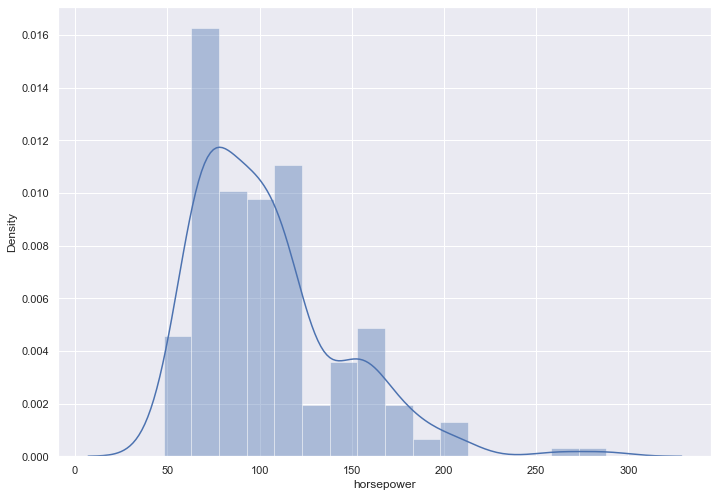

In [1494]:
df.horsepower = df.horsepower.astype(int)
sns.distplot(df.horsepower,kde=True)

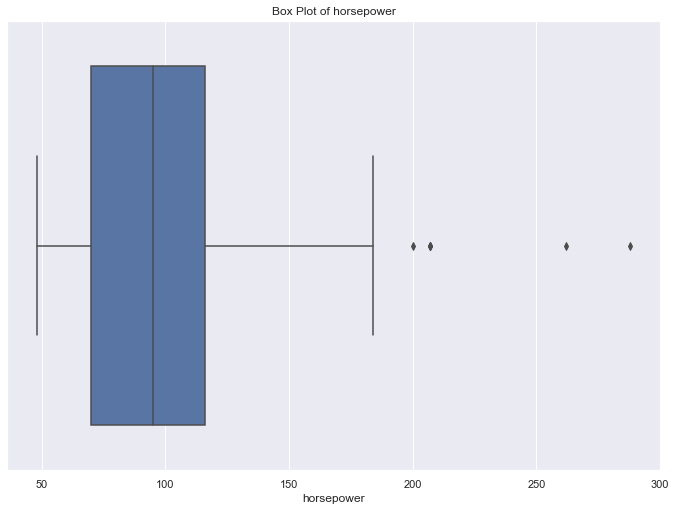

In [1495]:
sns.boxplot(df.horsepower)
plt.xlabel("horsepower")
plt.title("Box Plot of horsepower")
plt.show()

So sánh với thực tế, xe với 300 mã lực vẫn có. Vậy nên các biến outlier vẫn được giữ lại.

Ta lấy log cho biến này

<AxesSubplot:xlabel='log_horsepower', ylabel='Density'>

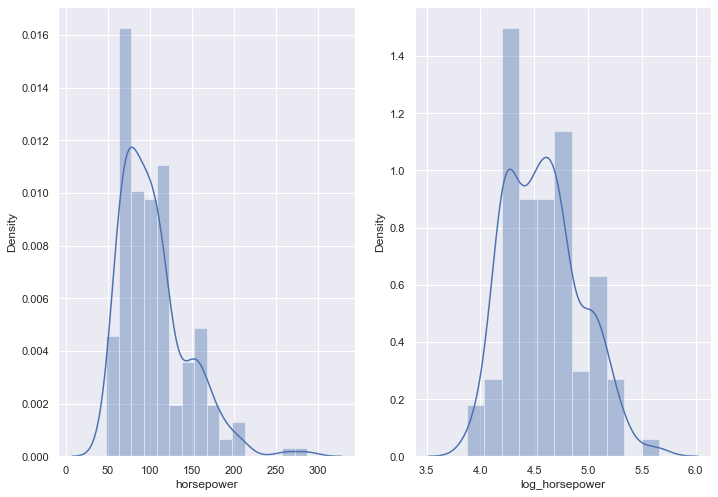

In [1496]:
df['log_horsepower'] = np.log(df['horsepower'])
plt.subplot(1, 2, 1)
sns.distplot(df['horsepower'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_horsepower'])

In [1497]:
df = df.drop('horsepower',axis=1)
df.shape

(205, 61)

### Biến peakrpm

In [1498]:
df.peakrpm.describe()

count      205
unique      24
top       5500
freq        37
Name: peakrpm, dtype: object

In [1499]:
df.peakrpm.value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peakrpm, dtype: int64

Biến có 2 giá trị missing value

In [1500]:
df.peakrpm[df.peakrpm=='?']=int(np.mean(df.peakrpm[df.peakrpm!='?'].astype(int)))

In [1501]:
df.peakrpm.value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
5125     2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peakrpm, dtype: int64

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

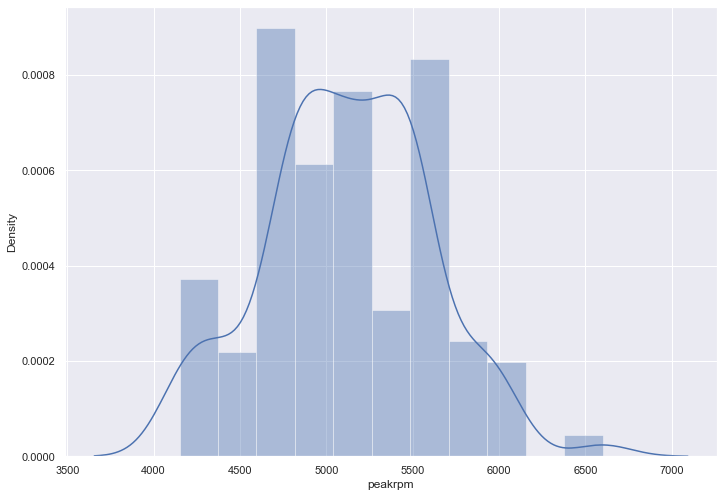

In [1502]:
df.peakrpm = df.peakrpm.astype(int)
sns.distplot(df.peakrpm,kde=True)

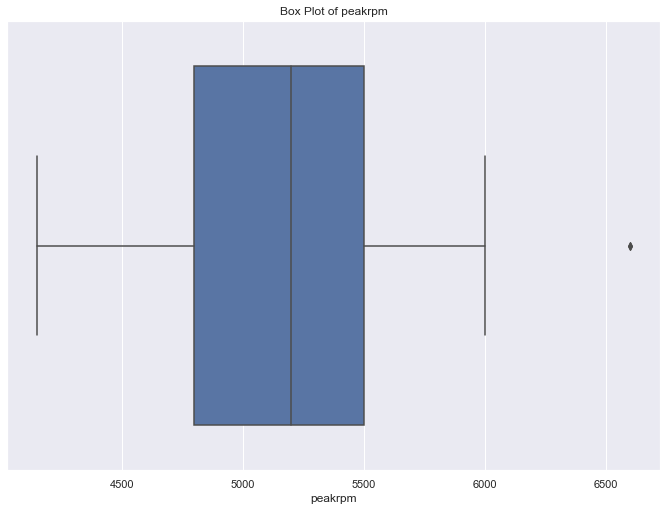

In [1503]:
sns.boxplot(df.peakrpm)
plt.xlabel("peakrpm")
plt.title("Box Plot of peakrpm")
plt.show()

Thang giá trị quá lớn, nhưng có phân phối khá đồng đều. Ta sử dụng standard scaler.

In [1504]:
scaler = StandardScaler()
df['stand_peakrpm'] = scaler.fit_transform(df[['peakrpm']])

<AxesSubplot:xlabel='stand_peakrpm', ylabel='Density'>

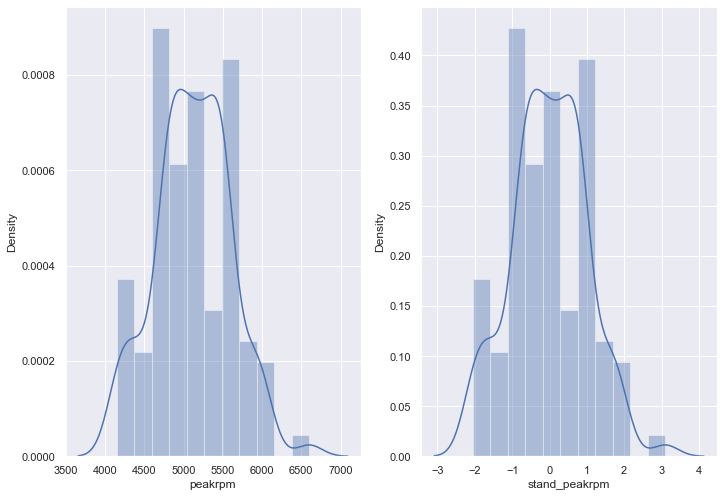

In [1505]:
plt.subplot(1, 2, 1)
sns.distplot(df['peakrpm'])

plt.subplot(1, 2, 2)
sns.distplot(df['stand_peakrpm'])

In [1506]:
df = df.drop('peakrpm',axis=1)
df.shape

(205, 61)

### Biến citympg

In [1507]:
df.citympg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

<AxesSubplot:xlabel='citympg', ylabel='Density'>

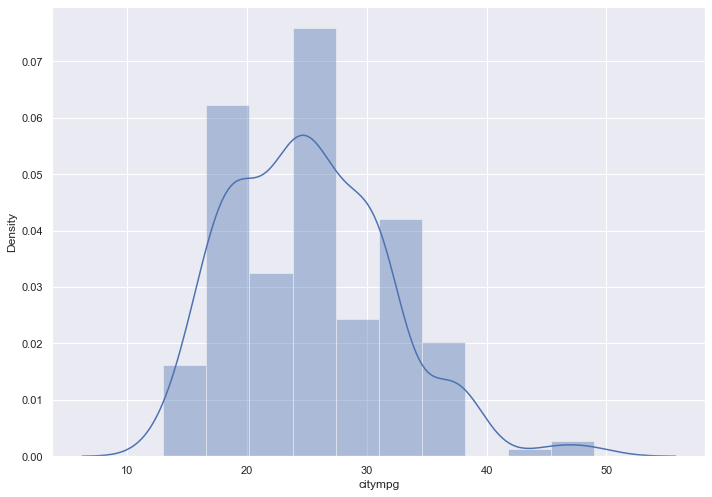

In [1508]:
sns.distplot(df.citympg,kde=True)

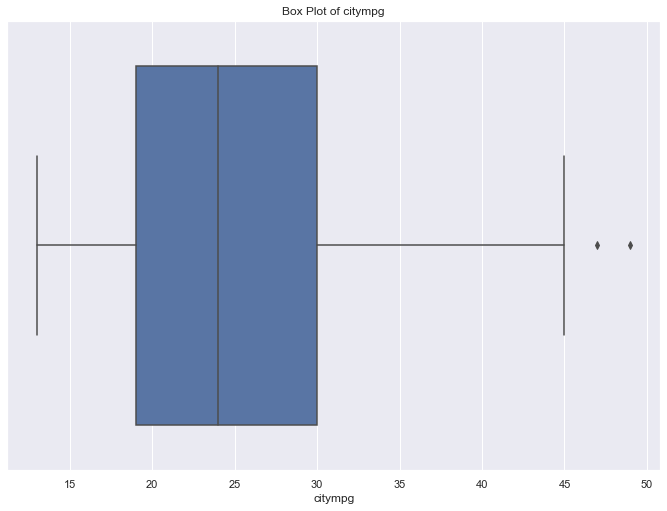

In [1509]:
sns.boxplot(df.citympg)
plt.xlabel("citympg")
plt.title("Box Plot of citympg")
plt.show()

Hai giá trị outlier giống trong các trường hợp trước đó. Ta chấp nhận các outlier này.

Dữ liệu hơi lệch phải, ta sử dụng minmaxscaler

In [1510]:
scaler = MinMaxScaler()
df['minmax_citympg'] = scaler.fit_transform(df[['citympg']])

<AxesSubplot:xlabel='minmax_citympg', ylabel='Density'>

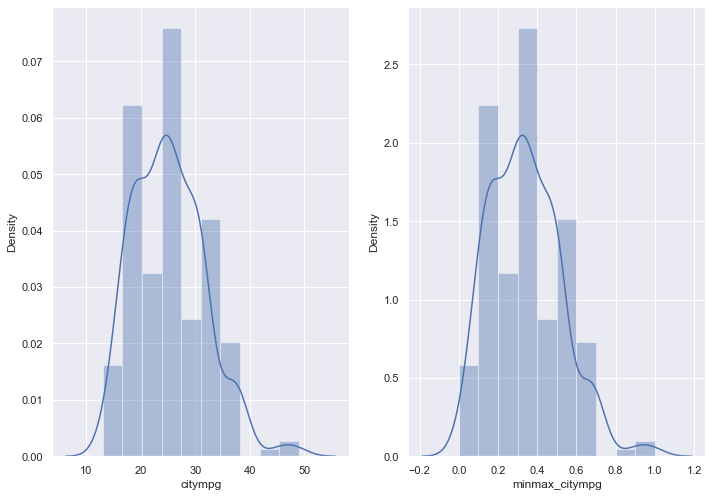

In [1511]:
plt.subplot(1, 2, 1)
sns.distplot(df['citympg'])

plt.subplot(1, 2, 2)
sns.distplot(df['minmax_citympg'])

In [1512]:
df = df.drop('citympg',axis=1)
df.shape

(205, 61)

### Biến highwaympg

In [1513]:
df.highwaympg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

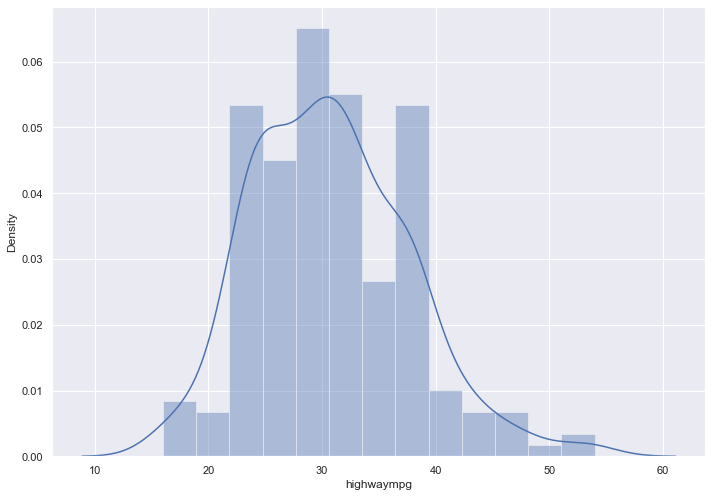

In [1514]:
sns.distplot(df.highwaympg,kde=True)

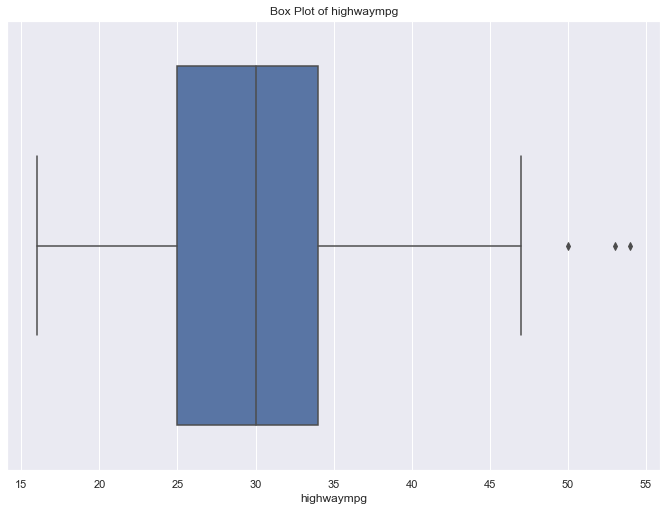

In [1515]:
sns.boxplot(df.highwaympg)
plt.xlabel("highwaympg")
plt.title("Box Plot of highwaympg")
plt.show()

Các giá trị outlier giống trong các trường hợp trước đó. Ta chấp nhận các outlier này.

Ta lấy log dữ liệu này

<AxesSubplot:xlabel='log_highwaympg', ylabel='Density'>

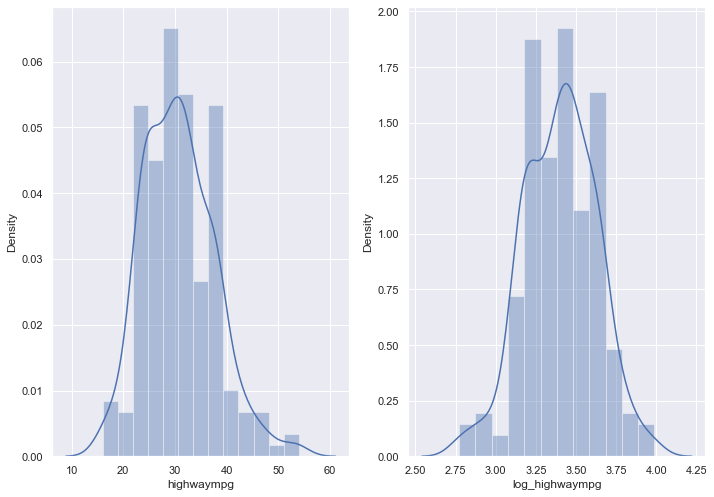

In [1516]:
df['log_highwaympg'] = np.log(df['highwaympg'])
plt.subplot(1, 2, 1)
sns.distplot(df['highwaympg'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_highwaympg'])

In [1517]:
df = df.drop('highwaympg',axis=1)
df.shape

(205, 61)

### Biến price

In [1518]:
df.price.describe()

count     205
unique    187
top         ?
freq        4
Name: price, dtype: object

In [1519]:
df.price.value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

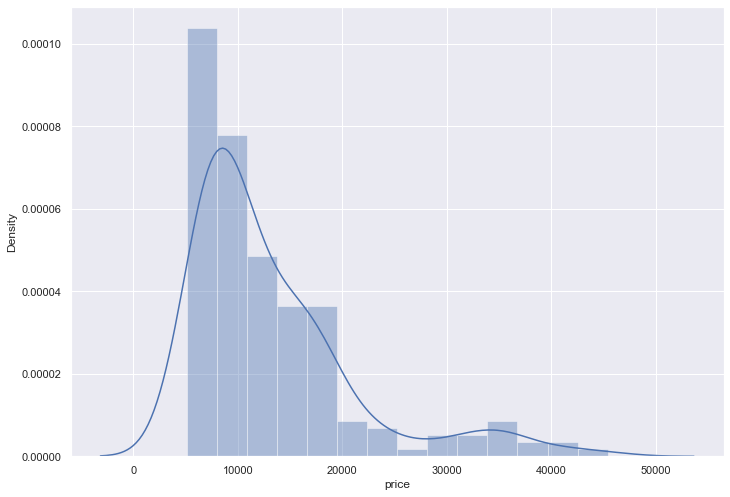

In [1520]:
sns.distplot(df.price[df.price!='?'],kde=True)

Ta thay thế giá trị missing bằng giá trị median. Với dữ liệu này ta nên lấy log

In [1521]:
df.price[df.price=='?']=int(np.median(df.price[df.price!='?'].astype(int)))

In [1522]:
df.price.value_counts()

10295    4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [1523]:
df.price = df.price.astype(int)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

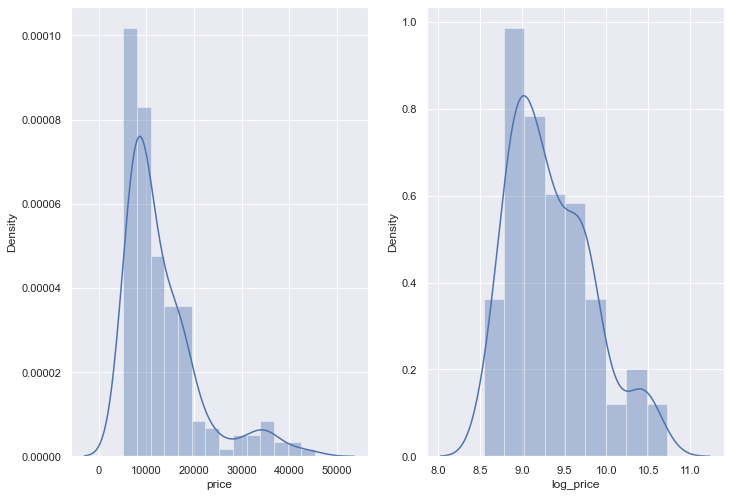

In [1524]:
df['log_price'] = np.log(df['price'])
plt.subplot(1, 2, 1)
sns.distplot(df['price'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_price'])

In [1525]:
df = df.drop('price',axis=1)
df.shape

(205, 61)

## Xác định các biến:

Ở đây, biến mục tiêu là price. Các biến khác là biến input.

## Thực hiện tính toán hồi quy tuyến tính

In [1526]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1527]:
y = df['log_price']

In [1528]:
X = df.drop('log_price',axis=1)

In [1529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [1530]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [1533]:
lm.intercept_

-15.04593292245129

In [1535]:
lm.coef_

array([-0.00323272, -0.03460604, -0.00823904, -0.05755033, -0.09350586,
       -0.04604579,  0.10484922,  0.17216378,  0.08930583,  0.44768293,
       -0.09001023, -0.19249607,  0.10149215,  0.09885409,  0.10427388,
        0.0566779 ,  0.175901  , -0.26017293, -0.01650076,  0.64176433,
       -0.18769792,  0.35104598, -0.13707259,  0.18884678,  0.24199964,
       -0.08122754, -0.0032816 ,  0.11477776, -0.06179016,  0.07984816,
       -0.17072311, -0.20544865, -0.16541954, -0.17485574, -0.03131412,
       -0.08311263,  0.86386602,  2.07296136,  1.58461934, -1.33784485,
        1.40951625,  1.47314012,  0.64176433,  1.45150293,  1.10586566,
        1.41999438,  1.96100206,  0.26324971, -0.04540207,  0.10535322,
        0.09208552,  0.06179016,  0.12844229,  0.13916123,  0.16398408,
        0.03849378,  0.18652769,  0.01869142, -0.11904654,  0.17620579])

In [1536]:
y_test_pred = lm.predict(X_test)

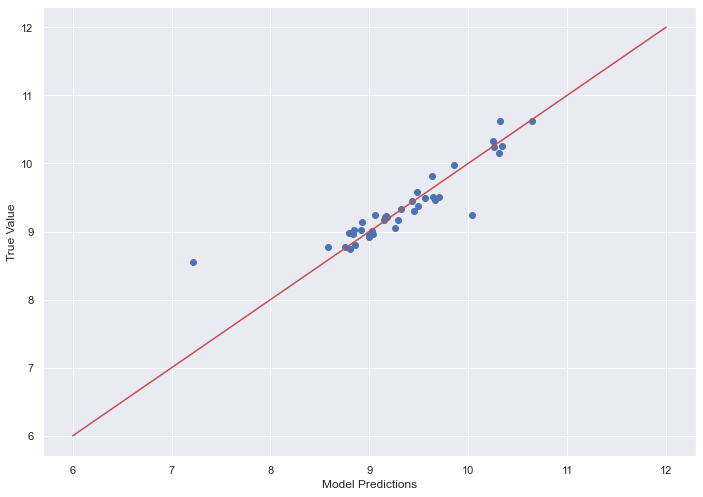

In [1543]:
plt.scatter(y_test_pred, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([6, 12], [6, 12], '-', color = 'r')

In [1547]:
lm.score(X_test,y_test)

0.7187207352539504

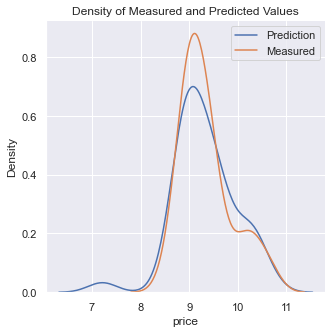

In [1546]:
plt.figure(figsize=[5,5])


# Density plot of the final predictions and the test values
sns.kdeplot(y_test_pred, label="Prediction")
sns.kdeplot(y_test, label="Measured")

# Label the plot
plt.xlabel("price")
plt.ylabel("Density")
plt.title("Density of Measured and Predicted Values")
plt.legend()
sns.despine()

Mô hình dự đoán được phần đầu của dữ liệu khi giá bán log_price nhỏ hơn 9. Với giá trị lớn hơn, mô hình cho kết quả sai lệch